### Let's Start!

In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Importing Libraries** <a id="1"></a>

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
sns.set_palette("Set2")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

from scipy import stats as st
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

from imblearn.over_sampling import SMOTE

# **Importing Dataset** <a id="2"></a>

In [106]:
Data = pd.read_csv('/content/Glaioma_paper_9featuers.csv')

In [107]:
Data.head()

,Sex,Age-at-MRI,WHO CNS Grade,MGMTstatus,MGMT index,OS,EOR,1-dead 0-alive,target
0,1,0.636364,1.0,0.0,0.000000,0.310957,0.5,1,2.0
1,0,0.818182,1.0,1.0,0.399658,0.064253,1.0,1,2.0
2,1,0.688312,1.0,1.0,0.399658,0.098538,0.5,1,2.0
3,1,0.688312,1.0,0.0,0.000000,0.042915,0.5,1,2.0
4,0,0.662338,1.0,0.0,0.000000,0.091825,0.5,1,2.0


In [108]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             501 non-null    int64  
 1   Age-at-MRI      501 non-null    float64
 2   WHO CNS Grade   501 non-null    float64
 3   MGMTstatus      501 non-null    float64
 4   MGMT index      501 non-null    float64
 5   OS              501 non-null    float64
 6   EOR             501 non-null    float64
 7   1-dead 0-alive  501 non-null    int64  
 8   target          501 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.4 KB



**There are null values present in 'bmi'.**

In [109]:
Data.isnull().sum()

Sex               0
Age-at-MRI        0
WHO CNS Grade     0
MGMTstatus        0
MGMT index        0
OS                0
EOR               0
1-dead 0-alive    0
target            0
dtype: int64

**After checking, as you can see there are no null values present in our column.**

In [110]:
Data.describe()

,Sex,Age-at-MRI,WHO CNS Grade,MGMTstatus,MGMT index,OS,EOR,1-dead 0-alive,target
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.596806,0.517796,0.845309,0.391218,0.399658,0.136485,0.305389,0.500998,1.618762
std,0.491029,0.195107,0.330943,0.218272,0.357302,0.123858,0.336973,0.500499,0.805213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.389610,1.000000,0.500000,0.058824,0.043874,0.000000,0.000000,2.000000
50%,1.000000,0.545455,1.000000,0.500000,0.399658,0.099497,0.500000,1.000000,2.000000
75%,1.000000,0.662338,1.000000,0.500000,0.764706,0.179333,0.500000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [111]:
Data.corr()

,Sex,Age-at-MRI,WHO CNS Grade,MGMTstatus,MGMT index,OS,EOR,1-dead 0-alive,target
Sex,1.000000,-0.058076,0.027723,-0.092819,-0.078014,-0.086036,0.032498,0.009779,-0.010167
Age-at-MRI,-0.058076,1.000000,0.435030,-0.069878,0.020837,-0.424334,-0.070974,0.272257,0.526949
WHO CNS Grade,0.027723,0.435030,1.000000,-0.171125,0.004069,-0.328437,-0.239105,0.305819,0.543788
MGMTstatus,-0.092819,-0.069878,-0.171125,1.000000,0.573949,0.090256,0.058291,-0.104272,-0.162469
MGMT index,-0.078014,0.020837,0.004069,0.573949,1.000000,0.088947,-0.048807,-0.103317,-0.091823
OS,-0.086036,-0.424334,-0.328437,0.090256,0.088947,1.000000,-0.118343,-0.230442,-0.353781
EOR,0.032498,-0.070974,-0.239105,0.058291,-0.048807,-0.118343,1.000000,0.015977,-0.156048
1-dead 0-alive,0.009779,0.272257,0.305819,-0.104272,-0.103317,-0.230442,0.015977,1.000000,0.301188
target,-0.010167,0.526949,0.543788,-0.162469,-0.091823,-0.353781,-0.156048,0.301188,1.000000


In [112]:
import pandas as pd
import numpy as np

rs = Data
df = pd.DataFrame(rs)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,Sex,Age-at-MRI,WHO CNS Grade,MGMTstatus,MGMT index,OS,EOR,1-dead 0-alive,target
Sex,1.00,-0.06,0.03,-0.09,-0.08,-0.09,0.03,0.01,-0.01
Age-at-MRI,-0.06,1.00,0.44,-0.07,0.02,-0.42,-0.07,0.27,0.53
WHO CNS Grade,0.03,0.44,1.00,-0.17,0.00,-0.33,-0.24,0.31,0.54
MGMTstatus,-0.09,-0.07,-0.17,1.00,0.57,0.09,0.06,-0.10,-0.16
MGMT index,-0.08,0.02,0.00,0.57,1.00,0.09,-0.05,-0.10,-0.09
OS,-0.09,-0.42,-0.33,0.09,0.09,1.00,-0.12,-0.23,-0.35
EOR,0.03,-0.07,-0.24,0.06,-0.05,-0.12,1.00,0.02,-0.16
1-dead 0-alive,0.01,0.27,0.31,-0.10,-0.10,-0.23,0.02,1.00,0.30
target,-0.01,0.53,0.54,-0.16,-0.09,-0.35,-0.16,0.30,1.00


# **Data Preprocessing** <a id="4"></a>

In [113]:
x = Data.drop('target', axis=1)
y = Data.target

In [114]:
x.head()

,Sex,Age-at-MRI,WHO CNS Grade,MGMTstatus,MGMT index,OS,EOR,1-dead 0-alive
0,1,0.636364,1.0,0.0,0.000000,0.310957,0.5,1
1,0,0.818182,1.0,1.0,0.399658,0.064253,1.0,1
2,1,0.688312,1.0,1.0,0.399658,0.098538,0.5,1
3,1,0.688312,1.0,0.0,0.000000,0.042915,0.5,1
4,0,0.662338,1.0,0.0,0.000000,0.091825,0.5,1


In [115]:
y.head(-10)

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
5      2.0
6      2.0
7      2.0
8      2.0
9      2.0
10     2.0
11     2.0
12     2.0
13     2.0
14     2.0
15     2.0
16     0.0
17     2.0
18     2.0
19     2.0
20     2.0
21     2.0
22     2.0
23     2.0
24     2.0
25     0.0
26     2.0
27     2.0
28     2.0
29     2.0
30     2.0
31     2.0
32     2.0
33     2.0
34     2.0
35     2.0
36     2.0
37     2.0
38     0.0
39     0.0
40     2.0
41     2.0
42     2.0
43     2.0
44     2.0
45     2.0
46     2.0
47     2.0
48     2.0
49     2.0
50     2.0
51     0.0
52     2.0
53     2.0
54     2.0
55     2.0
56     2.0
57     2.0
58     2.0
59     2.0
60     2.0
61     2.0
62     0.0
63     2.0
64     2.0
65     2.0
66     2.0
67     2.0
68     2.0
69     2.0
70     2.0
71     2.0
72     2.0
73     2.0
74     2.0
75     2.0
76     2.0
77     0.0
78     2.0
79     2.0
80     2.0
81     2.0
82     2.0
83     2.0
84     2.0
85     2.0
86     2.0
87     2.0
88     2.0
89     2.0
90     2.0

In [116]:
print('Shape of X: ', x.shape)
print('Shape of Y: ', y.shape)

Shape of X:  (501, 8)
Shape of Y:  (501,)


# Splitting the dataset into the Training set and Test set <a id="6"></a>

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [118]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (400, 8)
Number transactions y_train dataset:  (400,)
Number transactions x_test dataset:  (101, 8)
Number transactions y_test dataset:  (101,)


# Feature Scaling <a id="7"></a>

In [119]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

*StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler results in a distribution with a standard deviation equal to 1.*

# Handling Imbalance data using SMOTE <a id="8"></a>

*SMOTE - **Synthetic Minority Oversampling Technique** is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.*

In [120]:
from imblearn.over_sampling import SMOTE

In [121]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y_train==3)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train==1)))

sm = SMOTE(random_state=4)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res==3)))

Before OverSampling, counts of label '0': 65
Before OverSampling, counts of label '2': 304
Before OverSampling, counts of label '3': 13
Before OverSampling, counts of label '1': 18 

After OverSampling, the shape of train_X: (1216, 8)
After OverSampling, the shape of train_y: (1216,) 

After OverSampling, counts of label '0': 304
After OverSampling, counts of label '1': 304
After OverSampling, counts of label '2': 304
After OverSampling, counts of label '3': 304


In [122]:
x_train_res.shape

(1216, 8)

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_res, test_size= 0.2, random_state= 0)

In [124]:
pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        61
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00        52
         3.0       1.00      1.00      1.00        68

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244

accuracy is 1.0


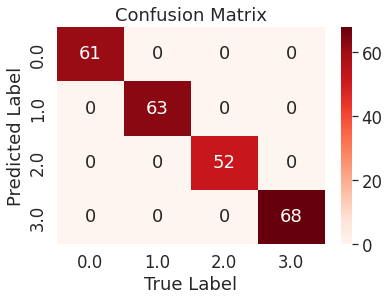

In [148]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train_res, y_train_res)

y_pred = model.predict(x_test)


# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))



cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with a color map
sns.heatmap(cm, annot=True, cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()


              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73        61
         1.0       1.00      1.00      1.00        63
         2.0       0.96      0.88      0.92        52
         3.0       0.78      0.91      0.84        68

    accuracy                           0.87       244
   macro avg       0.88      0.87      0.87       244
weighted avg       0.88      0.87      0.87       244

accuracy is 0.8729508196721312


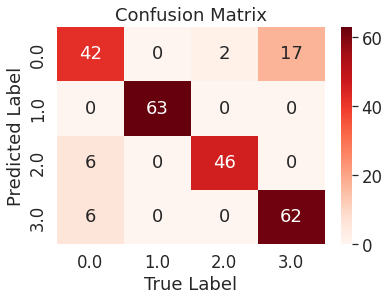

In [149]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train_res, y_train_res)

y_pred = model.predict(x_test)


# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))



cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with a color map
sns.heatmap(cm, annot=True, cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92        61
         1.0       1.00      1.00      1.00        63
         2.0       1.00      0.94      0.97        52
         3.0       0.92      1.00      0.96        68

    accuracy                           0.96       244
   macro avg       0.97      0.96      0.96       244
weighted avg       0.96      0.96      0.96       244

accuracy is 0.9631147540983607


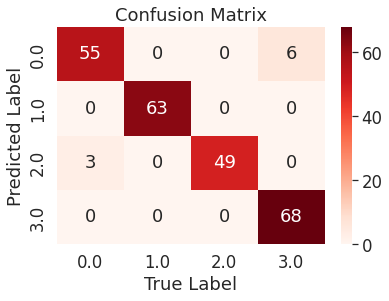

In [150]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(x_train_res, y_train_res)

y_pred = model.predict(x_test)


# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))



cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with a color map
sns.heatmap(cm, annot=True, cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89        61
         1.0       1.00      1.00      1.00        63
         2.0       0.98      1.00      0.99        52
         3.0       0.88      0.96      0.92        68

    accuracy                           0.95       244
   macro avg       0.95      0.95      0.95       244
weighted avg       0.95      0.95      0.95       244

accuracy is 0.9467213114754098


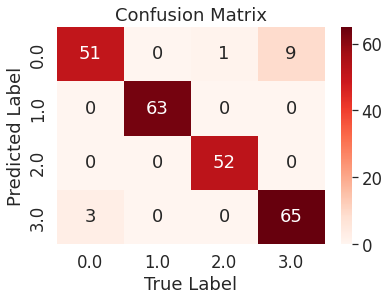

In [151]:
# Support Vector Machine
from sklearn.svm import SVC

model = SVC()

model.fit(x_train_res, y_train_res)

y_pred = model.predict(x_test)


# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))



cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with a color map
sns.heatmap(cm, annot=True, cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        61
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00        52
         3.0       0.97      1.00      0.99        68

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244

accuracy is 0.9918032786885246


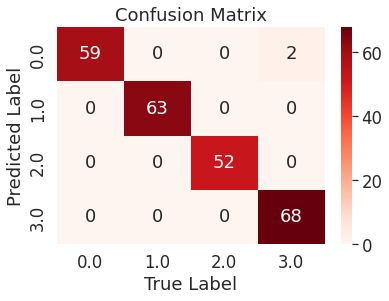

In [153]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

model.fit(x_train_res, y_train_res)

y_pred = model.predict(x_test)


# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))



cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with a color map
sns.heatmap(cm, annot=True, cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()